#sample of 50 student
import pandas as pd
df = pd.read_csv('StressLevelDataset.csv')
sample=df.head(10)
#we can also use df.sample(n=10)
print(sample)

In [11]:
##Show the missing value:

#We have No missing values 


missing_values = df.isna()

missing_counts = missing_values.sum()

rows_with_missing = df[df.isna().any(axis=1)]

print("Missing values in each column: \n",missing_counts);
#print(missing_counts);
print("\n Rows with missing values:",rows_with_missing);
#print(rows_with_missing);



Missing values in each column: 
 anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

 Rows with missing values: Empty DataFrame
Columns: [anxiety_level, self_esteem, mental_health_history, depression, headache, blood_pressure, sleep_quality, breathing_problem, noise_level, living_conditions, safety, basic_needs, academic_p

       anxiety_level  self_esteem  mental_health_history   depression  \
count    1100.000000  1100.000000            1100.000000  1100.000000   
mean       11.063636    17.777273               0.492727    12.555455   
std         6.117558     8.944599               0.500175     7.727008   
min         0.000000     0.000000               0.000000     0.000000   
25%         6.000000    11.000000               0.000000     6.000000   
50%        11.000000    19.000000               0.000000    12.000000   
75%        16.000000    26.000000               1.000000    19.000000   
max        21.000000    30.000000               1.000000    27.000000   

          headache  blood_pressure  sleep_quality  breathing_problem  \
count  1100.000000     1100.000000    1100.000000        1100.000000   
mean      2.508182        2.181818       2.660000           2.753636   
std       1.409356        0.833575       1.548383           1.400713   
min       0.000000        1.000000       0.000000     

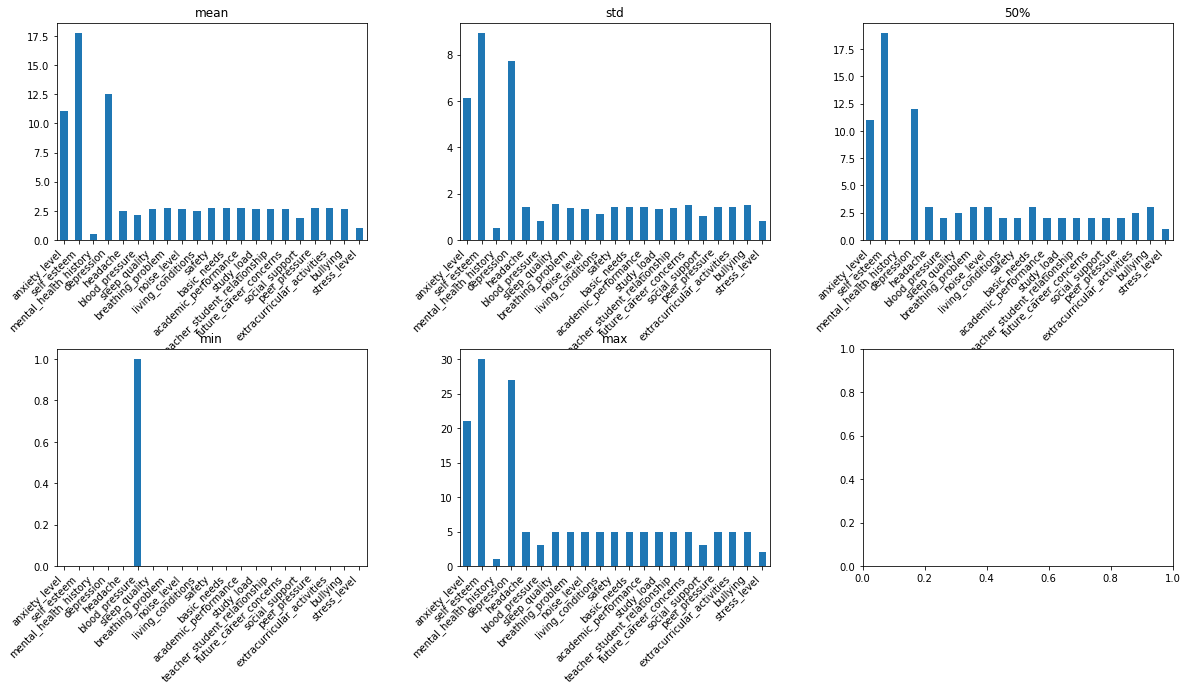

In [20]:
#statical summary 
summary_stats=df.describe()
print(summary_stats)

import pandas as pd
import matplotlib.pyplot as plt


# Plotting the summary statistics

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
stats_to_plot = ['mean', 'std', '50%', 'min', 'max']

for i, stat in enumerate(stats_to_plot):
    ax = axes.flat[i]
    summary_stats.loc[stat].plot(kind='bar', ax=ax)
    ax.set_title(stat)
    ax.set_xticklabels(summary_stats.columns, rotation=45, ha='right')



anxiety_level                   37.424518
self_esteem                     80.005852
mental_health_history            0.250175
depression                      59.706658
headache                         1.986284
blood_pressure                   0.694847
sleep_quality                    2.397489
breathing_problem                1.961998
noise_level                      1.763921
living_conditions                1.252626
safety                           1.977317
basic_needs                      2.055670
academic_performance             2.001075
study_load                       1.731280
teacher_student_relationship     1.917058
future_career_concerns           2.338989
social_support                   1.097940
peer_pressure                    2.031381
extracurricular_activities       2.009483
bullying                         2.343832
stress_level                     0.675146
dtype: float64


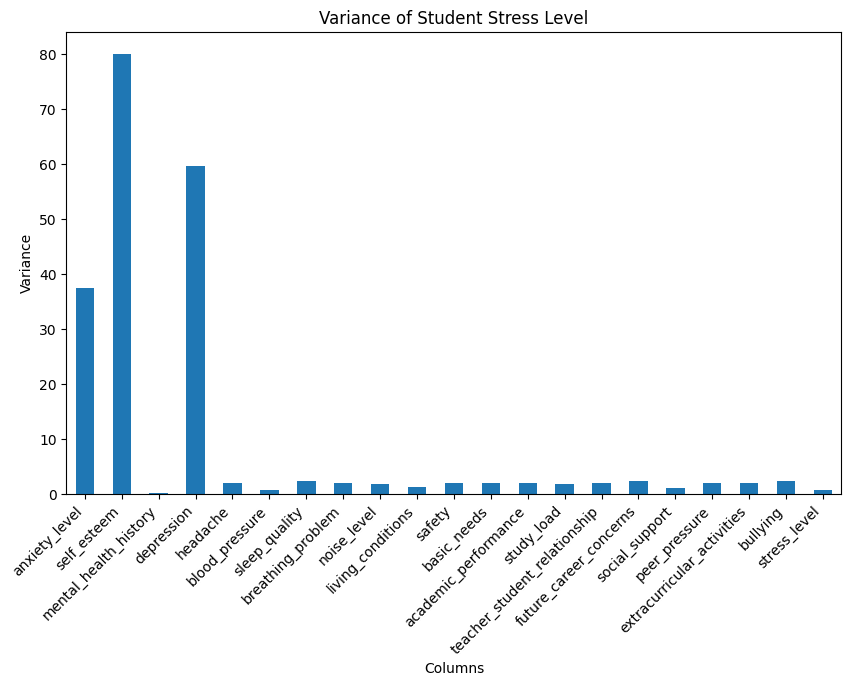

In [45]:
#Variance
variance= df.var(numeric_only=True);
print(variance);

# Plotting the variance
plt.figure(figsize=(10, 6))
variance.plot(kind='bar')
plt.title('Variance of Student Stress Level')
plt.ylabel('Variance')
plt.xlabel('Columns')
plt.xticks(rotation=45, ha='right')
plt.show()



In [46]:
#Data preproccesing


# Remove duplicates

import pandas as pd
df = pd.read_csv('../dataset/StressLevelDataset.csv')
number_of_duplicates = df.duplicated().sum()
df_cleaned = df.drop_duplicates()
print("Number of duplicate rows:", number_of_duplicates)
print("DataFrame after dropping all duplicate rows: \n ",df_cleaned)
df_cleaned.to_csv('StressLevelcleaned_dataset.csv', index=False)



Number of duplicate rows: 0
DataFrame after dropping all duplicate rows: 
        anxiety_level  self_esteem  mental_health_history  depression  headache  \
0                14           20                      0          11         2   
1                15            8                      1          15         5   
2                12           18                      1          14         2   
3                16           12                      1          15         4   
4                16           28                      0           7         2   
...             ...          ...                    ...         ...       ...   
1095             11           17                      0          14         3   
1096              9           12                      0           8         0   
1097              4           26                      0           3         1   
1098             21            0                      1          19         5   
1099             18            6 

In [48]:
#Missing values 
#There is no missing value
import pandas as pd
df = pd.read_csv('StressLevelcleaned_dataset.csv')


missing_values = df.isna()
missing_counts = missing_values.sum()
rows_with_missing = df[df.isna().any(axis=1)];

print("Missing values in each column: \n",missing_counts)

print("\nRows with missing values: \n",rows_with_missing)


Missing values in each column: 
 anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

Rows with missing values: 
 Empty DataFrame
Columns: [anxiety_level, self_esteem, mental_health_history, depression, headache, blood_pressure, sleep_quality, breathing_problem, noise_level, living_conditions, safety, basic_needs, academic_

In [1]:
import pandas as pd
import numpy as np

# Read the dataset
ds = pd.read_csv('../dataset/Sampled_StressLevelDataset.csv')

# Define a function to count outliers based on a Z-score threshold
def count_outliers(column, threshold=3):
    column_mean = column.mean()
    column_std = column.std()
    upper_bound = column_mean + threshold * column_std
    lower_bound = column_mean - threshold * column_std
    num_outliers = ((column > upper_bound) | (column < lower_bound)).sum()
    return num_outliers

# Count outliers in each column
outlier_counts = {}
numeric_columns = ds.select_dtypes(include=[np.number]).columns

for column in numeric_columns:
    num_outliers = count_outliers(ds[column])
    outlier_counts[column] = num_outliers

# Sum the total number of outliers across all numeric columns
rows_with_outliers = sum(outlier_counts.values())

# Print the number of outliers for each column and the total
for column, count in outlier_counts.items():
    print(f"Column: {column}, Number of outliers: {count}")

print(f"Total rows with outliers: {rows_with_outliers}")

Column: anxiety_level, Number of outliers: 0
Column: self_esteem, Number of outliers: 0
Column: mental_health_history, Number of outliers: 0
Column: depression, Number of outliers: 0
Column: headache, Number of outliers: 0
Column: blood_pressure, Number of outliers: 0
Column: sleep_quality, Number of outliers: 0
Column: breathing_problem, Number of outliers: 0
Column: noise_level, Number of outliers: 0
Column: living_conditions, Number of outliers: 0
Column: safety, Number of outliers: 0
Column: basic_needs, Number of outliers: 0
Column: academic_performance, Number of outliers: 0
Column: study_load, Number of outliers: 0
Column: teacher_student_relationship, Number of outliers: 0
Column: future_career_concerns, Number of outliers: 0
Column: social_support, Number of outliers: 0
Column: peer_pressure, Number of outliers: 0
Column: extracurricular_activities, Number of outliers: 0
Column: bullying, Number of outliers: 0
Column: stress_level, Number of outliers: 0
Total rows with outlier

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Read the dataset
ds = pd.read_csv('../dataset/Sampled_StressLevelDataset.csv')

# Initialize the LabelEncoder
le = LabelEncoder()

# (Assuming 'mental_health_history' is a categorical column with textual data like 'yes' and 'no')
ds['mental_health_history'] = le.fit_transform(ds['mental_health_history'])
print(ds)

     anxiety_level  self_esteem  mental_health_history  depression  headache  \
0               11           18                      1           9         3   
1               20           11                      1          26         4   
2                8           29                      0           4         1   
3                6           29                      0           4         1   
4               17            2                      1          23         4   
..             ...          ...                    ...         ...       ...   
495             20            1                      1          18         5   
496              5           25                      0           7         1   
497              3            2                      0          22         0   
498             21            1                      1          19         5   
499             21            7                      1          25         5   

     blood_pressure  sleep_quality  bre

In [2]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Load the dataset
iris = load_iris()
X, y = iris.data, iris.target

# Feature selection
k = 2  # Number of top features to select
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_selected = selector.fit_transform(X, y)

print("Selected Features:", X_selected.shape[1])
print("Selected Feature Indices:", selector.get_support(indices=True))


Selected Features: 2
Selected Feature Indices: [2 3]


In [3]:
from sklearn.preprocessing import MinMaxScaler

# Assuming X_selected from the feature selection step
# Normalize the features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)  # Use X instead of X_selected if no feature selection was performed

print("Normalized Features:")
print(X_normalized)


Normalized Features:
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.22222222 0.75       0.08474576 0.08333333]
 [0.30555556 0.58333333 0.11864407 0.04

In [3]:
import pandas as pd

# Read the dataset
ds = pd.read_csv('../dataset/Sampled_StressLevelDataset.csv')

# The column to discretize
column_to_discretize = 'anxiety_level'
num_bins = 3 

# Discretization using the pd.cut function
ds['discretized_anxiety_level'] = pd.cut(ds[column_to_discretize], bins=num_bins, labels=False)

# Print the original and the discretized column
print("Original DataFrame:")
print(ds[['anxiety_level', 'discretized_anxiety_level']])

Original DataFrame:
     anxiety_level  discretized_anxiety_level
0               11                          1
1               20                          2
2                8                          1
3                6                          0
4               17                          2
..             ...                        ...
495             20                          2
496              5                          0
497              3                          0
498             21                          2
499             21                          2

[500 rows x 2 columns]


In [5]:
import pandas as pd

# Read the dataset
ds = pd.read_csv('../dataset/Sampled_StressLevelDataset.csv')

# Aggregation by taking the mean of all columns grouped by 'stress_level'
aggregated_data = ds.groupby('stress_level').mean()

# print the aggregated data
print(aggregated_data)

              anxiety_level  self_esteem  mental_health_history  depression  \
stress_level                                                                  
0                  5.333333    25.192982               0.087719    6.157895   
1                 11.600000    18.712500               0.468750   11.937500   
2                 16.289941     8.390533               0.887574   20.319527   

              headache  blood_pressure  sleep_quality  breathing_problem  \
stress_level                                                               
0             1.263158        2.192982       4.146199           1.695906   
1             2.468750        1.387500       2.500000           3.081250   
2             3.698225        3.000000       1.366864           3.674556   

              noise_level  living_conditions    safety  basic_needs  \
stress_level                                                          
0                1.643275           3.350877  4.105263     4.140351   
1         

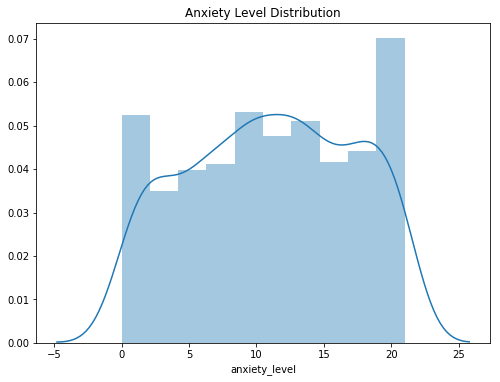

In [15]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('StressLevelDataset.csv')

# Plotting the relationships
plt.figure(figsize=(20, 10))

# Relationship between anxiety level and stress level
plt.subplot(2, 3, 1)
sns.distplot(data['anxiety_level'], bins=10)
plt.title('Anxiety Level Distribution')

plt.tight_layout()
plt.show()


<h4>The x-axis labeled "stress_level" likely represents a measurement of perceived stress level. It ranges from 0 to 25.
The y-axis labeled "Frequency" represents the number of people who reported experiencing each level of stress.
The vertical bars show the distribution of stress levels across the population. The height of each bar represents the number of people who reported experiencing that specific level of stress.
In this specific example, the distribution appears to be skewed towards the right, meaning that there are more people who experience lower levels of stress compared to those who experience higher levels of stre<h4>ss.

<Figure size 1440x720 with 0 Axes>

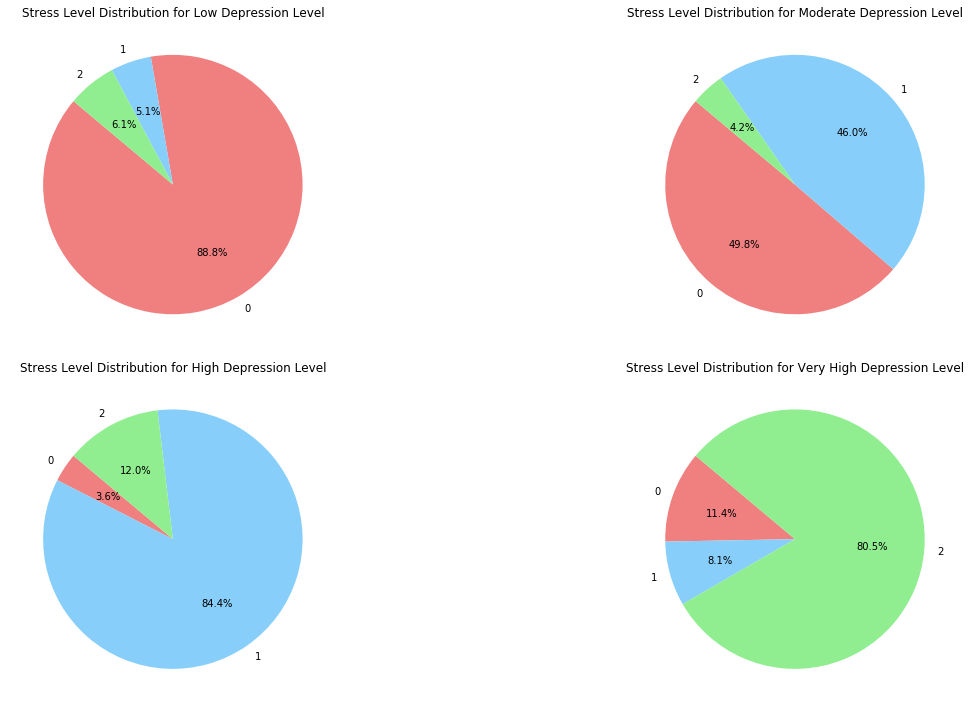

In [14]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('StressLevelDataset.csv')

# Plotting the relationships
plt.figure(figsize=(20, 10))

# Relationship between depression level and stress level

bins = [0, 5, 10, 15, 20]  # Example bins, adjust as needed
# Create a new column for depression level bins
data['Depression_Level_Bin'] = pd.cut(data['depression'], bins=bins, labels=['Low', 'Moderate', 'High', 'Very High'])
# Calculate the proportion of stress levels within each depression level bin
depression_stress_counts = data.groupby('Depression_Level_Bin')['stress_level'].value_counts(normalize=True).unstack()
# Plotting the pie chart
plt.figure(figsize=(20, 10))
# Choose the colors for the pie chart
colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'lightyellow']
# Plot each pie chart for each depression level bin
for i, index in enumerate(depression_stress_counts.index):
    plt.subplot(2, 2, i + 1)
    plt.pie(depression_stress_counts.loc[index], labels=depression_stress_counts.columns, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(f'Stress Level Distribution for {index} Depression Level')
    
plt.tight_layout()
plt.show()


<h4> The pie chart contains four separate pie charts, each titled with a different level of dehydration: "Low," "Moderate," "High," and "Very High."  Each pie chart shows the distribution of stress levels for that particular dehydration level.
  Stress Level Distribution for Low Dehydration:<br>

The majority (88.8%) of people with low dehydration experience low stress levels (1 on the scale).
A smaller proportion (6.1%) experience moderate stress levels (2 on the scale).
Very few people (5.1%) experience high stress levels (3 on the scale).
Stress Level Distribution for Moderate Dehydration:

The majority (49.8%) of people with moderate dehydration experience moderate stress levels (2 on the scale).
Around 42% experience low stress levels (1 on the scale).
A smaller proportion (8.1%) experience high stress levels (3 on the scale).
Stress Level Distribution for High Dehydration:

Similar to moderate dehydration, nearly half (46%) of people with high dehydration experience moderate stress levels (2 on the scale).
A slightly lower proportion (42%) experience low stress levels (1 on the scale).
A higher proportion (12%) experience high stress levels (3 on the scale) compared to the previous two pie charts.
Stress Level Distribution for Very High Dehydration:

The majority (80.5%) of people with very high dehydration experience high stress levels (3 on the scale).
A smaller proportion (11.4%) experience moderate stress levels (2 on the scale).
Very few people (8.1%) experience low stress levels (1 on the scale).
Overall Trend:
As the dehydration level increases, the proportion of people experiencing high stress levels also increases.  <h4>

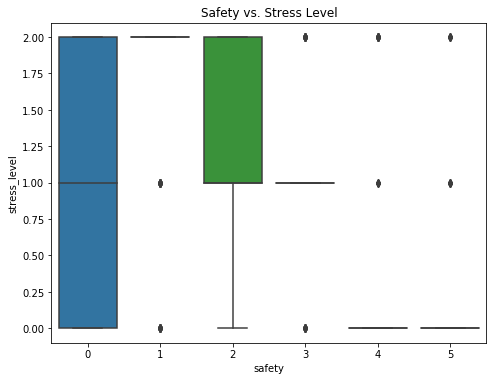

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('StressLevelDataset.csv')
# Plotting the relationships
plt.figure(figsize=(20, 10))

# Relationship between safety and stress level
plt.subplot(2, 3, 3)
sns.boxplot(data=data, x='safety', y='stress_level')
plt.title('Safety vs. Stress Level')

plt.tight_layout()
plt.show()


<h4> Given the information presented in the boxplot, it appears that the median stress level is higher than the median safety level. The spread of stress levels is also larger than the spread of safety levels, as indicated by the wider box for stress level.  There are also outliers on both the lower and upper ends for stress level <h4>

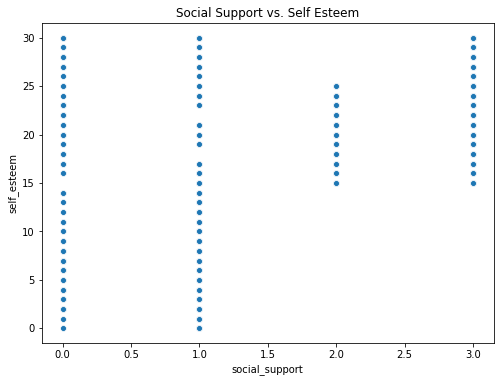

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('StressLevelDataset.csv')

# Plotting the relationships
plt.figure(figsize=(20, 10))

# Relationship between social support and self esteem
plt.subplot(2, 3, 4)
sns.scatterplot(data=data, x='social_support', y='self_esteem')
plt.title('Social Support vs. Self Esteem')

plt.tight_layout()
plt.show()


<h4> The scatter plot shows a positive relationship between social support and self-esteem. This means that as social support increases, self-esteem also tends to increase.
The x-axis represents social support, with values ranging from 0 to 20.
The y-axis represents self-esteem, with values ranging from 0 to 3.
There are several data points plotted on the scatter plot. Each data point represents the self-esteem score of an individual compared to their level of social support.
It is important to note that correlation does not imply causation. Just because there is a positive relationship between social support and self-esteem in this data set does not necessarily mean that social support causes self-esteem to increase. <h4>

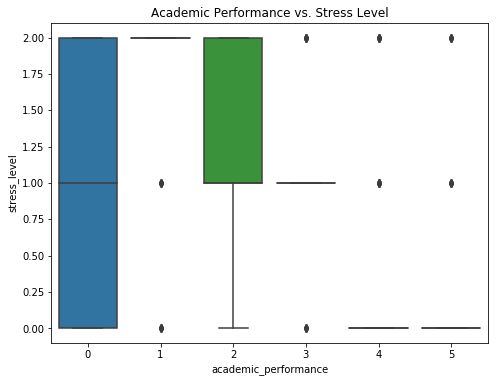

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('StressLevelDataset.csv')

# Plotting the relationships
plt.figure(figsize=(20, 10))

# Relationship between academic performance and stress levels
plt.subplot(2, 3, 5)
sns.boxplot(data=data, x='academic_performance', y='stress_level')
plt.title('Academic Performance vs. Stress Level')

plt.tight_layout()
plt.show()


<h4>  The median of academic performance is around 1.25.
There is a wider spread of data points for lower stress levels.
There are a few outliers for both high and low stress levels.
Overall, the boxplot suggests that students with higher stress levels tend to have lower academic performance. However, it is important to note that this is just a correlation and does not necessarily mean that stress causes low academic performance.<h4>